In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


/var/folders/xk/6w4szy0s6xj0j43rcv1pvyqm0000gn/T/ipykernel_41889/220540388.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
/var/folders/xk/6w4szy0s6xj0j43rcv1pvyqm0000gn/T/ipykernel_41889/220540388.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')


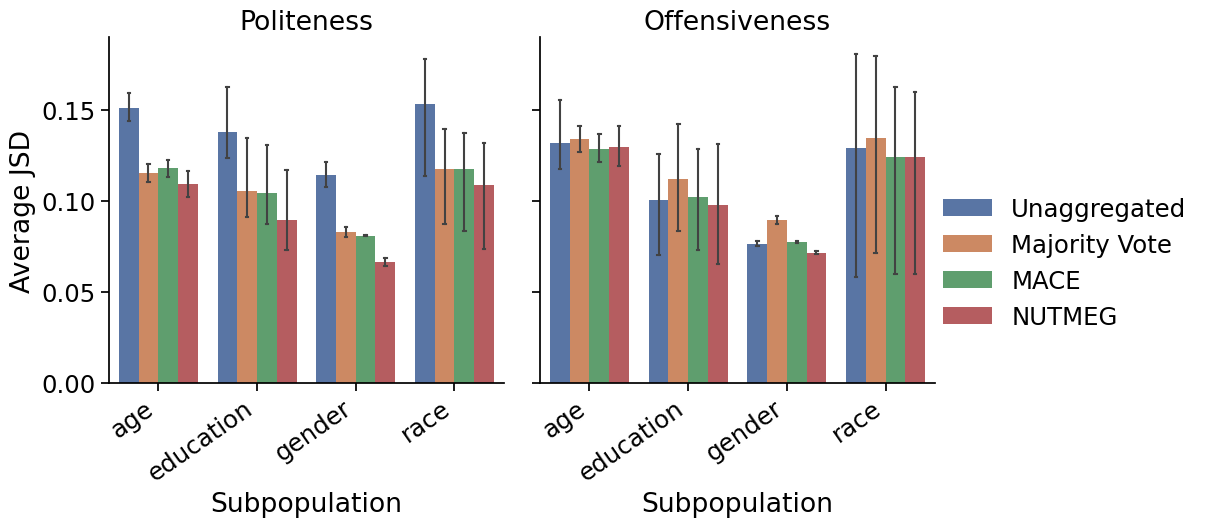

In [ ]:
df = pd.read_csv('figure_data/downstream_model_comparison.csv')
# sort by method to change axis order
df = df.sort_values(['subpopulation', 'task'], ascending=[True, False])

# rename tasks
df['task'] = df['task'].replace({'popquorn_politeness':'Politeness', 'popquorn_offensiveness':'Offensiveness'})

# rename methods
df['method'] = df['method'].replace({'individual':'Unaggregated', 'majority':'Majority Vote'})
df['method'] = df['method'].replace({'INDIVIDUAL':'Unaggregated', 'MAJORITY':'Majority Vote'})

# set font and theme
sns.reset_defaults()
sns.set_context("notebook", font_scale=1.6)

# create facet grid for the two tasks
g = sns.FacetGrid(df, col="task", sharey=True, height=5)  # Adjust col_wrap for layout

# generate barplot
g.map_dataframe(sns.barplot,
                x="subpopulation",
                y="mean_jsd",
                hue="method",
                hue_order=["Unaggregated", "Majority Vote", "MACE", "NUTMEG"],
                err_kws={"linewidth":1.5},
                capsize=.1,
                palette="deep")

g.set_axis_labels("Subpopulation", "Average JSD")
g.add_legend()
g.set_titles("{col_name}")

# modify tick labels to be more readable
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')

plt.show()
